In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt 
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

sphist = pd.read_csv('sphist.csv')
sphist.shape

(16590, 7)

In [148]:
sphist.head(4)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010


In [149]:
sphist.Date = pd.to_datetime(sphist.Date)
sphist = sphist.sort_values(by = 'Date', ascending=False)

## Time Series statistical [computations](http://pandas.pydata.org/pandas-docs/stable/computation.html)

### 5 days window

In [150]:
for row in sphist.iterrows():
    if row[1][0] < dt(1950, 1, 10):
        break
    else:
        sphist.loc[row[0],'day_5'] = np.mean(sphist.loc[row[0] + 1 : row[0] +5, 'Close'])
        sphist.loc[row[0],'day_5_std'] = np.std(sphist.loc[row[0] + 1 : row[0] +5, 'Close'])

### 30 days window

In [151]:
for row in sphist.iterrows():
    if row[1][0] < dt(1950, 2, 14):
        break
    else:
        sphist.loc[row[0],'day_30'] = np.mean(sphist.loc[row[0] + 1 : row[0] +30, 'Close'])
        sphist.loc[row[0],'day_30_std'] = np.std(sphist.loc[row[0] + 1 : row[0] +30, 'Close'])

### 365 days window

In [152]:
for row in sphist.iterrows():
    if row[1][0] < dt(1951, 6, 18):
        break
    else:
        sphist.loc[row[0],'day_365'] = np.mean(sphist.loc[row[0] + 1 : row[0] +365, 'Close'])
        sphist.loc[row[0],'day_365_std'] = np.std(sphist.loc[row[0] + 1 : row[0] +365, 'Close'])

In [153]:
sphist['5_365_mean_ratio'] = sphist.day_5 / sphist.day_365
sphist['5_365_std_ratio'] = sphist.day_5_std / sphist.day_365_std

sphist['5_30_mean_ratio'] = sphist.day_5 / sphist.day_30
sphist['5_30_std_ratio'] = sphist.day_5_std / sphist.day_30_std

In [154]:
sphist['day_of_week'] = sphist['Date'].dt.dayofweek

In [155]:
sphist = pd.concat([sphist.drop('day_of_week', axis=1), pd.get_dummies(sphist['day_of_week'], prefix='dow')], axis=1)

In [156]:
sphist.dropna(axis=0, inplace=True)

In [157]:
sphist.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_5_std,day_30,...,day_365_std,5_365_mean_ratio,5_365_std_ratio,5_30_mean_ratio,5_30_std_ratio,dow_0,dow_1,dow_2,dow_3,dow_4
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,2080.771973,17.715146,2080.237329,...,63.971050,1.021554,0.276924,1.000257,0.915715,1,0,0,0,0
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,17.530725,2078.931331,...,64.033724,1.021580,0.273773,1.000733,0.883404,0,0,0,0,1
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,8.348225,2077.908659,...,64.189442,1.025573,0.130056,1.005004,0.379431,0,0,0,1,0
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,7.116786,2076.283993,...,64.264312,1.026680,0.110742,1.006718,0.301974,0,0,1,0,0
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,3.502675,2073.984998,...,64.282022,1.025297,0.054489,1.006287,0.144501,0,1,0,0,0


In [158]:
sphist_old = sphist
train = sphist[sphist['Date'] < dt(2013,1,1)]
test = sphist[sphist['Date'] >= dt(2013,1,1)]

In [159]:
train_cols = ['day_5', 'day_5_std',
              'day_30', 'day_30_std',
              'day_365', 'day_365_std',
              '5_30_mean_ratio', '5_30_std_ratio',
              '5_365_mean_ratio', '5_365_std_ratio',
              'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4'
             ]
target = 'Close'

lr = LinearRegression()
model = lr.fit(X = train[train_cols],y = train[target])
predictions = model.predict(test[train_cols])

MAE = np.mean(np.abs(predictions - test[target]))

In [160]:
MAE

16.22134671136525

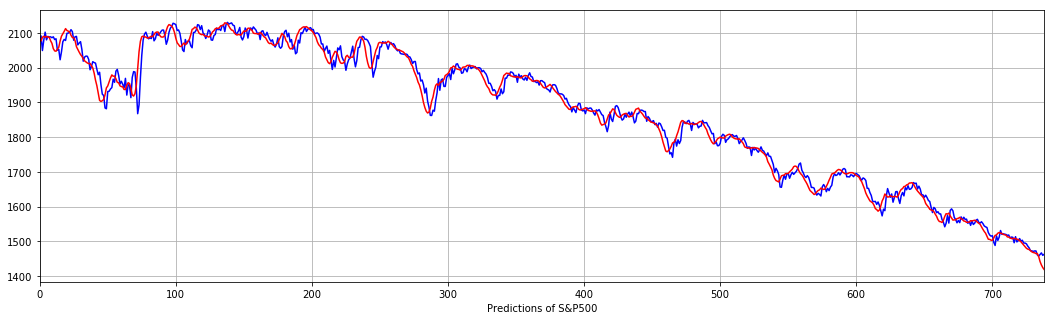

In [161]:
plt.figure(figsize=(18,5))
plt.xlabel('Predictions of S&P500')

ax1 = test.Close.plot(color='blue', grid=True, label='real')
ax2 = plt.plot(list(predictions),color='red')

plt.show()

### Some metrics that can make model better!

* The average volume over the past five days.
* The ratio between the average volume for the past five days, and the average volume for the past year.
* The standard deviation of the average volume over the past five days.
* The standard deviation of the average volume over the past year.
* The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
* The year component of the date.
* The ratio between the lowest price in the past year and the current price.
* The ratio between the highest price in the past year and the current price.
* The year component of the date.
* The month component of the date.
* The day of week.
* The day component of the date.
* The number of holidays in the prior month.

### Some advices
* You can also incorporate outside data, such as the weather in New York City (where most trading happens) the day before, and the amount of Twitter activity around certain stocks.

* You can also make the system real-time by writing an automated script to download the latest data when the market closes, and make predictions for the next day.

* Finally, you can make the system "higher-resolution". You're currently making daily predictions, but you could make hourly, minute-by-minute, or second by second predictions. This will require obtaining more data, though. You could also make predictions for individual stocks instead of the S&P500.